<strong>Introduction and Background</strong>

I have designed a recommendation system that predicts movies to be recommended to the users. I have used movielens dataset to train the Machine Learning Model.

Today, we are habitual of using online websites such as e-commerece, streaming service. Most of us might have wondered that how an e-commerece website like amazon display options such as" Frequently Bought Together' items or recommended items to our list or on Youtube, we have some videos with display 'recommended for you'. These recommendations are predicted by an algorithm known as Recommendation Engine/system. 

A Recommender System is a subclass of information filtering system that predicts the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications. It employs a statistical algorithm that seeks to predict users' ratings for a particular entity, based on the similarity between the entities or similarity between the users that previously rated those entities. The intuition is that similar types of users are likely to have similar ratings for a set of entities.

Types of Recommender Systems

There are two major approaches to build recommender systems: Content-Based Filtering and Collaborative Filtering:

Content-Based Filtering

In content-based filtering, the similarity between different products is calculated on the basis of the attributes of the products. For instance, in a content-based movie recommender system, the similarity between the movies is calculated on the basis of genres, the actors in the movie, the director of the movie, etc. So If a user likes a movie of a particular actor and a director, then it is likely that he will also like another movie of same actor and director.

Collaborative Filtering
The intuition behind collaborative filtering is that if a user A likes products Product1 and Product2, and if another user B likes Product1, there is a good chance that he will like the  Product2 as well.

Take the example of a movie recommender system. Suppose a huge number of users have assigned the same ratings to movies X and Y. A new user comes who has assigned the same rating to movie X but hasn't watched movie Y yet. Collaborative filtering system will recommend him the movie Y.

 <strong> Methodology </strong>
 
 
<strong>Data pipeline followed in this project </strong>
    

A data pipeline provides organized access to reliable and well-structured datasets for analytics. Automating the movement and transformation of data allows the consolidation of data from multiple sources so that it can be used strategically. 



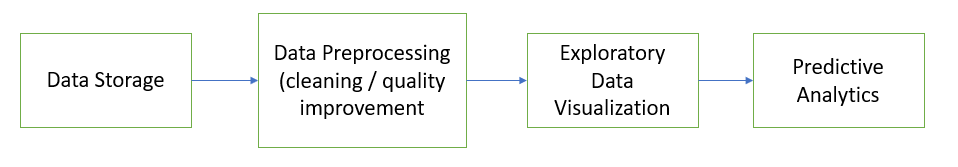

In [2]:
from IPython.display import Image
Image(filename='Capture.PNG')

<strong>Data Storage </strong>

Data Stoarge is the process of obtaining and importing data for immediate use or storage in a database. 

I have downloaded the MovieLens 100K Dataset from the website given in the assignmnet. The data was in zip format, I extract the files in csv format, as it is easier to work on csv format in python.


<strong>Data Processing</strong>

Data preprocessing is an important and often required component in data analytics. Data preprocessing becomes even more important when consuming unstructured text data generated from multiple different sources. Data preprocessing steps include operations such as cleaning the data, extracting important features from data, removing duplicate items from the datasets, converting data formats

In [3]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv("ratings.csv")
rating_df.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


You can see from the output that the "ratings.csv" file contains the userId, movieId, ratings, and timestamp attributes. Each row in the dataset corresponds to one rating. The userId column contains the ID of the user who left the rating. The movieId column contains the Id of the movie, the rating column contains the rating left by the user. Ratings can have values between 1 and 5. And finally, the timestamp refers to the time at which the user left the rating.

There is one problem with this dataset. It contains the IDs of the movies but not their titles. We'll need movie names for the movies we're recommending. The movie names are stored in the "movies.csv" file. Let's import the file and see the data it contains. 

In [4]:
movie_df = pd.read_csv("movies.csv")
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


As you can see, this dataset contains movieId, the title of the movie, and its genre. We need a dataset that contains the userId, movie title, and its ratings. We have this information in two different dataframe objects: "ratings_data" and "movie_names". To get our desired information in a single dataframe, we can merge the two dataframes objects on the movieId column since it is common between the two dataframes.

We can do this using merge() function from the Pandas library, as shown below:

In [5]:
movie_data = pd.merge(rating_df, movie_df, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Now let's take a look at the average rating of each movie. To do so, we can group the dataset by the title of the movie and then calculate the mean of the rating for each movie. We will then display the first five movies along with their average rating using the head() method. Look at the the following script:

In [6]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [7]:
# Sorted Rating in Descending order
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

 <strong>Discussion</strong>
 
 <strong>Exploratory Data Anlysis</strong>



Exploratory data analysis (EDA) is a method of analyzing data sets to depict and summarize their main features, often with visual methods. In simple words, EDA helps us to know about the data beyond the formal modeling or hypothesis testing task.

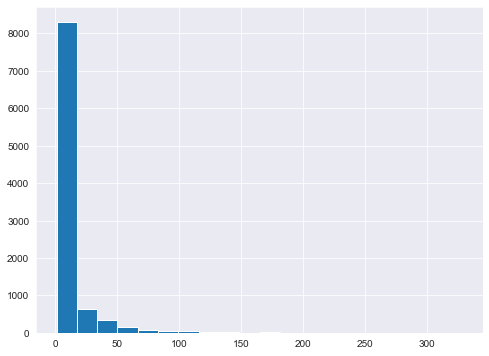

In [8]:
#Plotted a histogram for the number of ratings represented by the "rating_counts" column in movie_data

ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=20)

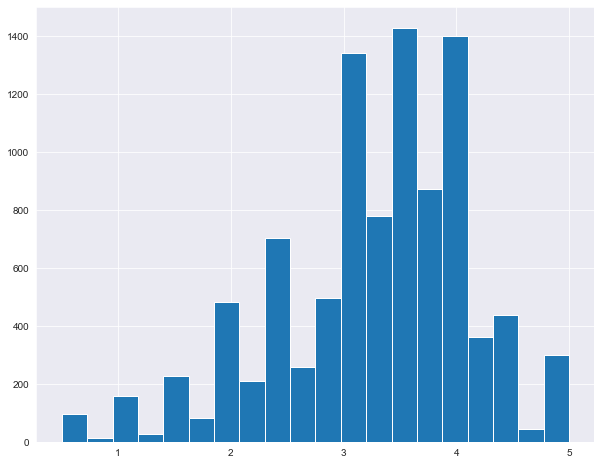

In [9]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=20)

You can see that the integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data.

Earlier, we said that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating. Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings:

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x576 with 0 Axes>

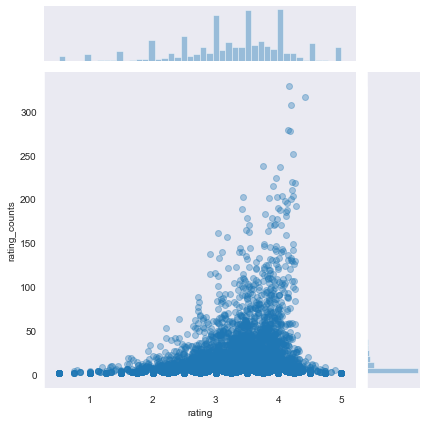

In [10]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.35)

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.



<strong>Discussion</strong>

<strong>Predictive Analytics</strong>

Predictive Analytics comes under advance analytics and is the process of  extracting information from given data sets with a motive to determine patterns and predict future outcomes and trends.

Predictive Analytics uses many techniques from Data Mining, Machine Learning, Statistics, Artificial Intelligence to analyze the dataset and make the predictions.

Here, I have used Collaborative filtering, a Data Mining technique which is widely applied in recommendation system.

In [11]:
rating_df.head()
movie_df.head()
n_users = rating_df.userId.unique().shape[0]
n_movies = rating_df.movieId.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 610 | Number of movies = 9724


In [12]:
Rating_data = rating_df.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Rating_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
Rating = Rating_data.as_matrix()
mean_Rating = np.mean(Rating, axis = 1)

#Substraction mean rating from each rating
Scaled_rating = Rating - mean_Rating.reshape(-1, 1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Model-based Collaborative Filtering is based on matrix factorization (MF) which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF:

The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items.
When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization, you can restructure the user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector.
You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.
For example, let's check the sparsity of the ratings dataset:

In [14]:
sparsity = round(1.0 - len(rating_df) / float(n_users * n_movies), 3)
print ('The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens1M dataset is 98.3%


<strong>Support Vector Decomposition (SVD)</strong>

A well-known matrix factorization method is Singular value decomposition (SVD). At a high level, SVD is an algorithm that decomposes a matrix $A$ into the best lower rank (i.e. smaller/simpler) approximation of the original matrix $A$. Mathematically, it decomposes A into a two unitary matrices and a diagonal matrix:

$A$ = $U$ $\Sigma$  $V^{T}$

$A_{mxn}$ = $U_{mxm}$ $\Sigma_{mxn}$  $V^{T}_{nxn}$




where $A$ is the input data matrix (users's ratings), $U$ is the left singular vectors (user "features" matrix), $\Sigma$ is the diagonal matrix of singular values (essentially weights/strengths of each concept), and $V^{T}$ is the right singluar vectors (movie "features" matrix). $U$ and $V^{T}$ are column orthonomal, and represent different things. $U$ represents how much users "like" each feature and $V^{T}$ represents how relevant each feature is to each movie.

To get the lower rank approximation, I take these matrices and keep only the top $k$ features, which can be thought of as the underlying tastes and preferences vectors.



In [15]:
from scipy.sparse.linalg import svds
U, sigma, V_transpose = svds(Scaled_rating, k = 50)
sigma = np.diag(sigma)

In [16]:
predicted_ratings_users = np.dot(np.dot(U, sigma), V_transpose) + mean_Rating.reshape(-1, 1)
pred_1 = pd.DataFrame(predicted_ratings_users, columns = Rating_data.columns)
pred_1.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


In [23]:
# Now I write a function to return the movies with the highest predicted rating that the specified user hasn't already rated. 
# complete picture of the recommendations.

def recommend_movies(no_of_recommendations, userID, movie_data, ratings_given,preds ):
    
    # Get and sort the user's predictions
    # User ID starts at 1, not 0
    user_row_number = userID - 1 
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) 
    
    # Get the user's data and merge in the movie information.
    user_data = ratings_given[ratings_given.userId == (userID)]
    user_merged = (user_data.merge(movie_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations_to_users = (movie_df[~movie_df['movieId'].isin(user_merged['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'preds'}).
         sort_values('preds', ascending = False).
                       iloc[:no_of_recommendations, :-1]
                      )

    return user_merged, recommendations_to_users

In [24]:
# Top 20 movies that User 1 has rated 
already_rated, predictions = recommend_movies(24, 1, movie_data, rating_df, pred_1)
already_rated.head(20)


,userId,movieId,rating,timestamp,title,genres
231,1,5060,5.0,964984002,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War
185,1,2872,5.0,964981680,Excalibur (1981),Adventure|Fantasy
89,1,1291,5.0,964981909,Indiana Jones and the Last Crusade (1989),Action|Adventure
90,1,1298,5.0,964984086,Pink Floyd: The Wall (1982),Drama|Musical
190,1,2948,5.0,964982191,From Russia with Love (1963),Action|Adventure|Thriller
189,1,2947,5.0,964982176,Goldfinger (1964),Action|Adventure|Thriller
188,1,2944,5.0,964981872,"Dirty Dozen, The (1967)",Action|Drama|War
186,1,2899,5.0,964982703,Gulliver's Travels (1939),Adventure|Animation|Children
184,1,2858,5.0,964980868,American Beauty (1999),Drama|Romance
179,1,2700,5.0,964980985,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy|Musical


<strong>Results</strong>

The list of the movies that the user with UserID 1 will like

In [25]:
# Top 20 movies that User 1 hopefully will enjoy
predictions

,movieId,title,genres
736,1036,Die Hard (1988),Action|Crime|Thriller
844,1221,"Godfather: Part II, The (1974)",Crime|Drama
974,1387,Jaws (1975),Action|Horror
615,858,"Godfather, The (1972)",Crime|Drama
1328,1968,"Breakfast Club, The (1985)",Comedy|Drama
874,1259,Stand by Me (1986),Adventure|Drama
1927,2804,"Christmas Story, A (1983)",Children|Comedy
1416,2080,Lady and the Tramp (1955),Animation|Children|Comedy|Romance
2765,4011,Snatch (2000),Comedy|Crime|Thriller
1417,2081,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance


Above are the list of the movies which we can recommend to user with userID 1. Similary, we can predict for the other users and suggest them the list of movies

<strong>Conclusion</strong>

The recommendation engines have the potential to change the way websites communicate with users and to allow companies to maximize their ROI based on the information they can gather on each customer's preferences and purchases.
In this Project, I designed a model-based Collaborative Filtering movie recommendation sytem based on latent features from a low rank matrix factorization method known as Singular Value Decomposition. Since, SVD captures the underlying features driving the raw data, it can scale significantly better to massive datasets as well as make better recommendations based on user's behaviour.
The above designed recommendation system can also be used in suggesting an item on the e-commerece website such as Amazon,ebay etc.It can also be used to suggest music, television programs, books, documents on google page, websites, conferences, tourism scenic spots and learning materials, and involve the areas of e-commerce, e-learning, e-library, e-government and e-business services.

However, there is a chance that we may  lose some meaningful signals by using a low-rank approximation. Specifically, there's an interpretability problem as a singular vector specifies a linear combination of all input columns or rows. There's also a lack of sparsity when the singular vectors are quite dense. Thus, SVD approach is limited to linear projections.


References: 
https://www.sciencedirect.com/science/article/pii/S0167923615000627

https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada

https://towardsdatascience.com/how-to-build-a-simple-song-recommender-296fcbc8c85

https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d

https://github.com/khanhnamle1994/movielens/

https://towardsdatascience.com/beginners-recommendation-systems-with-python-ee1b08d2efb6

